# Assignment 3: Getting Started with Regression

First, use the following block to set up the variables needed for later sections.

In [2]:
#import the packages you need to this notebook:
import pandas as pd
import sklearn
from sklearn import (cluster,
                     datasets,
                     decomposition,
                     discriminant_analysis,
                     dummy,
                     ensemble,
                     feature_selection as ftr_sel,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     multiclass as skmulti,
                     naive_bayes,
                     neighbors,
                     pipeline,
                     preprocessing as skpre,
                     svm,
                     tree)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.model_selection import train_test_split

### Exploring the Housing dataset: Loading the Housing dataset into a data frame
Use the code below to load the "housing.data.txt" file into a dataframe (using "pd.read_csv" attribute). Rename the columns as:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [48]:
df = pd.read_csv("housing.data.txt",
                 header=None,
                 sep='\s+')
#write your code to rename the columns:
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

### Question 1
Select 6 variables as features (independent variables) based on your judgement and generate a pairplot for a global view of the data. 

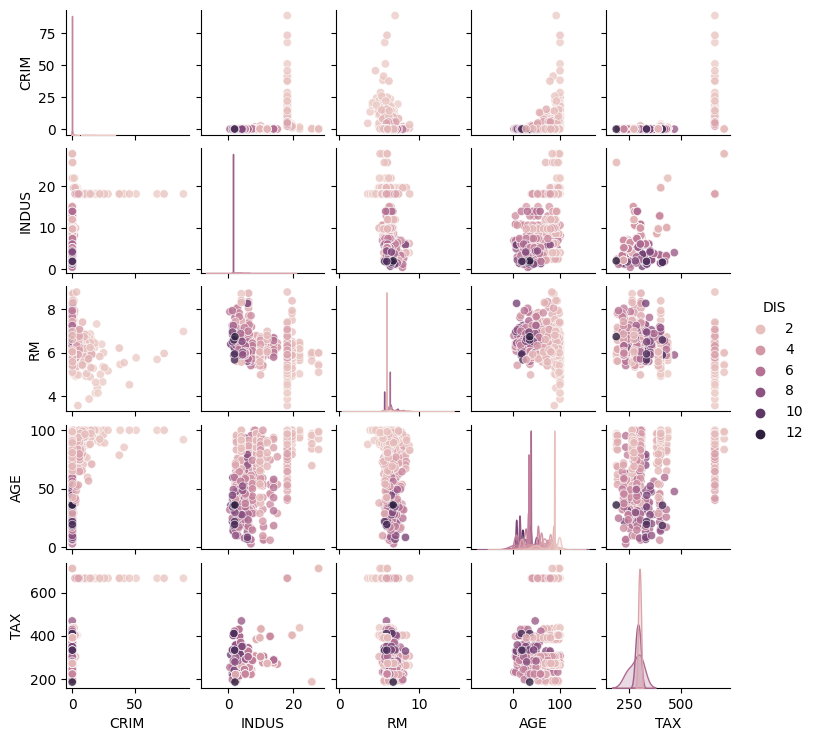

In [49]:
#write the code here
sns.pairplot(df[['CRIM', 'INDUS', 'RM', 'AGE', 'DIS','TAX']], 
             height=1.5, hue='DIS', plot_kws={'alpha': 0.8})

### Question 2
Implement an ordinary least squares linear regression model on this dataset to predict Median value of owner-occupied homes.
<br>Evaluate the model using MSE as the metric.

In [50]:
#write your code for train test split:
X=df[['CRIM', 'INDUS', 'RM', 'AGE', 'DIS','TAX']]
y=df[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
#write your code for the model implementation:
lr    = linear_model.LinearRegression()
fit   = lr.fit(X_train, y_train)
preds = fit.predict(X_test)
print('The MSE is',metrics.mean_squared_error(y_test, preds),'The Mean Error is',np.sqrt(metrics.mean_squared_error(y_test, preds)),'The MEDV mean is',np.mean(df['MEDV']))
#The model seems to have a high MSE considering the mean MEDV is roughly 22.5 and the data is off, on average, by roughly 6.9 

The MSE is 47.54950821583774 The Mean Error is 6.895615144121497 The MEDV mean is 22.532806324110677


### Question 3
Implemente KNN regressor on this dataset to predict Median value of owner-occupied homes. Try different values for k and compare this model with the linear regressor.

In [116]:
#write your code here
knn   = neighbors.KNeighborsRegressor(n_neighbors=10)
k_fit   = knn.fit(X_train, y_train)
k_preds = k_fit.predict(X_test)
k_preds
metrics.mean_squared_error(y_test, k_preds)

82.59874019607841

In [8]:
#comparison: The KNN regressor method yields a worse fit than the linear regressor method, even with an increased amount of neighbors.
#The linear regressor model is far more effective for this data.


### Question 4

Find a business related dataset from https://www.kaggle.com/datasets and download the .csv data file. (make sure it's not too big, less than 500k would be ideal)
Load the data onto this notebook and perform regression analysis using both of the models in this week and compare their performance. You can just select the numerical variables in the original dataset for your analysis (feature encoding will be covered in later chapter). If the data you found has been encoded and standardized that's perfect too. Write your code in the following cell for your regression analysis and summarize the findings either using a markdown cell or using comments. Upload your data file along with this notebook for submission. 

#### For undergraduate students: if you have shown your efforts to this problem, full credits will be assigned. For graduate stduents:  your work will be graded based on the quality of completion.

In [28]:
#write your code here. Feel free to organize your snippets in different cells and add some notes:
HR_df=pd.read_csv('HR_Analytics.csv.csv')
#The above CSV file shows a number of employee features 
HR_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [33]:
#Want to do a regression showing the effects of Age, Gender, Education, JobInvolvement, 
#JobLevel, and TotalWorkingYears on HourlyRate
HR_df_cut=HR_df.drop(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],axis=1)
#The above function was found from the Pandas database and was used to remove the unused columns https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
HR_df_cut

,Age,Education,Gender,HourlyRate,JobInvolvement,JobLevel,TotalWorkingYears
0,41,2,Female,94,3,2,8
1,49,1,Male,61,2,2,10
2,37,2,Male,92,2,1,7
3,33,4,Female,56,3,1,8
4,27,1,Male,40,3,1,6
...,...,...,...,...,...,...,...
1465,36,2,Male,41,4,2,17
1466,39,1,Male,42,2,3,9
1467,27,3,Male,87,4,2,6
1468,49,3,Male,63,2,2,17


In [41]:
HR_df_final=pd.get_dummies(HR_df_cut,columns=['Gender'])
#The above function was found from the Pandas database and was used to convert the Gender column into categorical
#variables. By default, this creates two columns: 'Gender_Male' and 'Gender_Female'. Only one is needed so the below
#line drops one of the columns. https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
HR_df_final=HR_df_final.drop(['Gender_Male'],axis=1)
HR_df_final

,Age,Education,HourlyRate,JobInvolvement,JobLevel,TotalWorkingYears,Gender_Female
0,41,2,94,3,2,8,1
1,49,1,61,2,2,10,0
2,37,2,92,2,1,7,0
3,33,4,56,3,1,8,1
4,27,1,40,3,1,6,0
...,...,...,...,...,...,...,...
1465,36,2,41,4,2,17,0
1466,39,1,42,2,3,9,0
1467,27,3,87,4,2,6,0
1468,49,3,63,2,2,17,0


In [52]:
HR_X=HR_df_final[['Age', 'Education', 'Gender_Female', 'JobInvolvement', 'JobLevel','TotalWorkingYears']]
HR_y=HR_df_final[['HourlyRate']]
X_train_HR, X_test_HR, y_train_HR, y_test_HR = train_test_split(HR_X,HR_y,test_size=0.3,random_state=0)
fit_HR= lr.fit(X_train_HR, y_train_HR)
preds_HR = fit_HR.predict(X_test_HR)

In [79]:
print('The MSE is',metrics.mean_squared_error(y_test_HR, preds_HR),
      'The Mean Error is',np.sqrt(metrics.mean_squared_error(y_test_HR, preds_HR)),
      'The HourlyRate mean is',np.mean(HR_df_final['HourlyRate']))
#The mean error is very high considering the averave hourly rate is roughly $66. 
#This indicates that these independent variables together do not do a good job explaining the Hourly Rate 

The MSE is 412.3012330528115 The Mean Error is 20.305202117999503 The HourlyRate mean is 65.89115646258503


In [94]:
knn_HR   = neighbors.KNeighborsRegressor(n_neighbors=50)
HR_k_fit   = knn_HR.fit(X_train_HR, y_train_HR)
HR_k_preds = HR_k_fit.predict(X_test_HR)
HR_k_preds
print('The MSE is',metrics.mean_squared_error(y_test_HR, HR_k_preds),
      'The Mean Error is',np.sqrt(metrics.mean_squared_error(y_test_HR, HR_k_preds)))

The MSE is 406.94372607709744 The Mean Error is 20.172846256220204


In [ ]:
#Both methods yield a very similar MSE. Unfortunately, this error is very large, making the methods not very effective 